# Dummy time data

Regular Python code located in ...

... using these data:

Imports.

In [1]:
# EpyNN/nnlive/dummy_time/prepare_dataset.ipynb
# Standard library imports
import random
import os

# Related third party imports
import matplotlib.pyplot as plt
import numpy as np

# Local application/library specific imports
from settings import dataset as se_dataset

Set `random` and `numpy` seed for reproducibility.

In [2]:
random.seed(1)
np.random.seed(1)

Dummy time features.

In [3]:
def features_time(SAMPLING_RATE=128, TIME=1):
    """Generate dummy time features.

    Time features may be white noise or a sum with a pure sin-wave.

    The pure sin-wave has random frequency lower than SAMPLING_RATE // 2.

    :param SAMPLING_RATE: Sampling rate (Hz)
    :type SAMPLING_RATE: int

    :param TIME: Sampling time (s)
    :type TIME: int

    :return: Normalized and digitized random time features of length N_FEATURES.
    :rtype: class:`numpy.ndarray`

    :return: Raw random time features of length N_FEATURES
    :rtype: class:`numpy.ndarray`

    :return: Raw white noise of length N_FEATURES
    :rtype: class:`numpy.ndarray`
    """
    # Number of bins for signal digitalization
    N_BINS = 16 # 4-bits ADC converter

    # BINS
    BINS = np.linspace(0, 1, N_BINS, endpoint=False)

    # Sampling rate (Hz) and Time (s)
    SAMPLING_RATE = 128
    TIME = 1

    # Number of features describing a sample
    N_FEATURES = SAMPLING_RATE * TIME

    # Initialize features array
    raw_features = np.linspace(0, TIME, N_FEATURES, endpoint=False)
    
    # Random choice of true signal frequency
    signal_frequency = random.uniform(0, SAMPLING_RATE // 2)
    
    # Generate pure sine wave of N_FEATURES points
    raw_features = np.sin(2 * np.pi * signal_frequency * raw_features)

    # Generate white noise
    white_noise = np.random.normal(0, 1, size=N_FEATURES) * 0.1

    # Random choice for raw_features
    raw_features = random.choice([raw_features + white_noise, white_noise])

    # Normalize features in range 0-1
    features = raw_features + np.abs(np.min(raw_features))
    features /= np.max(features)

    # Digitize and normalize digits
    features = np.digitize(features,bins=BINS) / BINS.shape[0]

    return features, raw_features, white_noise

Check the function.

(128,)


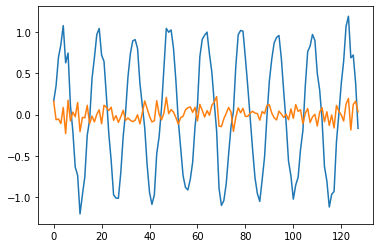

In [4]:
features, raw_features, white_noise = features_time()
print(features.shape)

plt.plot(raw_features)
plt.plot(white_noise)
plt.show()

Again.

(128,)


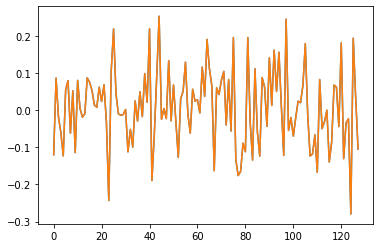

In [5]:
features, raw_features, white_noise = features_time()
print(features.shape)

plt.plot(raw_features)
plt.plot(white_noise)
plt.show()

Features.

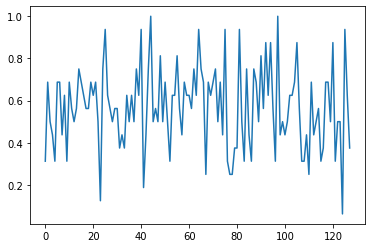

In [6]:
plt.plot(features)
plt.show()

Label from features.

In [7]:
def label_features(raw_features, white_noise):
    """Prepare label associated with features.

    :param raw_features: Random times features of length N_FEATURES
    :type raw_features: class:`numpy.ndarray`

    :param white_noise: Raw white noise of length N_FEATURES
    :type white_noise: class:`numpy.ndarray`
    
    :return: One-hot encoded label
    :rtype: list[int]
    """
    # One-hot encoded positive and negative labels
    p_label = [1, 0]
    n_label = [0, 1]

    # Test if features contains signal (+)
    if np.sum(raw_features) != np.sum(white_noise):
        label = p_label

    # Test if features does not contain signal (-)
    elif np.sum(raw_features) == np.sum(white_noise):
        label = n_label

    return label

Check the function.

In [8]:
label = label_features(raw_features, white_noise)
print(label)

[0, 1]


Prepare labeled dataset.

In [9]:
def labeled_dataset(se_dataset):
    """Prepare a dummy dataset of labeled samples.
    
    One sample is a list such as [features, label].
    
    For one sample, features is a class:`numpy.ndarray` and label is a list.

    :param se_dataset: Settings for dataset preparation
    :type se_dataset: dict

    :return: A dataset of length N_SAMPLES
    :rtype: list[list[class:`numpy.ndarray`,list[int]]]
    """
    # See ./settings.py
    N_SAMPLES = se_dataset['N_SAMPLES']

    # Initialize dataset
    dataset = []

    # Iterate over N_SAMPLES
    for i in range(N_SAMPLES):

        # Retrieve features, raw_features and white_noise
        features, raw_features, white_noise = features_time()

        # Retrieve label associated with features
        label = label_features(raw_features, white_noise)
        
        # Define labeled sample
        sample = [features, label]

        # Append sample to dataset
        dataset.append(sample)

    # Shuffle dataset
    random.shuffle(dataset)
    
    return dataset

Check the function.

In [10]:
se_dataset['N_SAMPLES'] = 10

for sample in labeled_dataset(se_dataset):
    features, label = sample
    print(features.shape, label)

(128,) [1, 0]
(128,) [1, 0]
(128,) [1, 0]
(128,) [1, 0]
(128,) [1, 0]
(128,) [0, 1]
(128,) [0, 1]
(128,) [1, 0]
(128,) [0, 1]
(128,) [1, 0]


Prepare unlabeled dataset.

In [11]:
def unlabeled_dataset(N_SAMPLES=1):
    """Prepare a dummy dataset of unlabeled samples.
    
    One sample is a list such as [features, []].

    For one sample, features is a class:`numpy.ndarray` and label is an empty list.

    :param N_SAMPLES: Length for unlabeled dataset
    :type N_SAMPLES: int

    :return: A dataset of length N_SAMPLES
    :rtype: list[list[class:`numpy.ndarray`,list]]
    """
    # Initialize unlabeled_dataset
    unlabeled_dataset = []

    # Iterate over N_SAMPLES
    for i in range(N_SAMPLES):

        # Retrieve features
        features, _, _ = features_time()

        # Define unlabeled sample
        sample = [features, []]

        # Append sample to dataset
        unlabeled_dataset.append(sample)

    return unlabeled_dataset

Check the function.

In [12]:
for sample in unlabeled_dataset(N_SAMPLES=5):
    features, label = sample
    print(features.shape, label)

(128,) []
(128,) []
(128,) []
(128,) []
(128,) []


Done.